# Loading Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# so that u dont have warnings
from warnings import filterwarnings
filterwarnings('ignore')

# Reading data

In [2]:
# Reading restaurants data
data_path_app = r'C:/Users/CHARMI/Desktop/data/applicant.csv'
data_path_loan = r'C:/Users/CHARMI/Desktop/data/loan.csv'

from pandas import read_csv

In [3]:
app= read_csv(data_path_app)
loan= read_csv(data_path_loan)

# Results
print(f'Applicant Dataset shape: {app.shape}')
print(f'Loan Dataset shape: {loan.shape}')

loan.head()


Applicant Dataset shape: (1000, 15)
Loan Dataset shape: (1000, 13)


,loan_application_id,applicant_id,Months_loan_taken_for,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Other_EMI_plans,Number_of_existing_loans_at_this_bank,Loan_history,high_risk_applicant
0,d68d975e-edad-11ea-8761-1d6f9c1ff461,1469590,6,electronic equipment,1169000,4,real estate,0,0,NaN,2,critical/pending loans at other banks,0
1,d68d989e-edad-11ea-b1d5-2bcf65006448,1203873,48,electronic equipment,5951000,2,real estate,0,0,NaN,1,existing loans paid back duly till now,1
2,d68d995c-edad-11ea-814a-1b6716782575,1432761,12,education,2096000,2,real estate,0,0,NaN,1,critical/pending loans at other banks,0
3,d68d99fc-edad-11ea-8841-17e8848060ae,1207582,42,FF&E,7882000,2,building society savings agreement/life insurance,0,1,NaN,1,existing loans paid back duly till now,0
4,d68d9a92-edad-11ea-9f3d-1f8682db006a,1674436,24,new vehicle,4870000,3,NaN,0,0,NaN,2,delay in paying off loans in the past,1


In [4]:

app.head()

,applicant_id,Primary_applicant_age_in_years,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Has_been_employed_for_at_most,Telephone,Foreign_worker,Savings_account_balance,Balance_in_existing_bank_account_(lower_limit_of_bucket),Balance_in_existing_bank_account_(upper_limit_of_bucket)
0,1469590,67,male,single,1,own,4,skilled employee / official,7 years,NaN,Registered under the applicant's name,1,NaN,NaN,0
1,1203873,22,female,divorced/separated/married,1,own,2,skilled employee / official,1 year,4 years,NaN,1,Low,0,2 lac
2,1432761,49,male,single,2,own,3,unskilled - resident,4 years,7 years,NaN,1,Low,NaN,NaN
3,1207582,45,male,single,2,for free,4,skilled employee / official,4 years,7 years,NaN,1,Low,NaN,0
4,1674436,53,male,single,2,for free,4,skilled employee / official,1 year,4 years,NaN,1,Low,NaN,0


### Observations:
* The application id seems in same order, thus they can be concatenated
* Still we will analyze it in order to eliminate chances of missing rows 

# Concatenation of both dataset

### Understanding both dataframes

In [5]:
app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   applicant_id                                              1000 non-null   int64 
 1   Primary_applicant_age_in_years                            1000 non-null   int64 
 2   Gender                                                    1000 non-null   object
 3   Marital_status                                            1000 non-null   object
 4   Number_of_dependents                                      1000 non-null   int64 
 5   Housing                                                   1000 non-null   object
 6   Years_at_current_residence                                1000 non-null   int64 
 7   Employment_status                                         1000 non-null   object
 8   Has_been_employed_for_at_leas

In [6]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                                       Non-Null Count  Dtype 
---  ------                                       --------------  ----- 
 0   loan_application_id                          1000 non-null   object
 1   applicant_id                                 1000 non-null   int64 
 2   Months_loan_taken_for                        1000 non-null   int64 
 3   Purpose                                      988 non-null    object
 4   Principal_loan_amount                        1000 non-null   int64 
 5   EMI_rate_in_percentage_of_disposable_income  1000 non-null   int64 
 6   Property                                     846 non-null    object
 7   Has_coapplicant                              1000 non-null   int64 
 8   Has_guarantor                                1000 non-null   int64 
 9   Other_EMI_plans                              186 non-null    object
 10  Number_of_exi

### Making sure that applicants ID are unique in both the dataset

In [7]:
app['applicant_id'].nunique()

1000

In [8]:
loan['applicant_id'].nunique()

1000

### Checking if both the columns are equal or not for all the 1000 values before concatenating

In [9]:
app['applicant_id'].equals(loan['applicant_id'])

True

Both columns are ready for concatenation

In [10]:
df_sample= pd.merge(app, loan, on=["applicant_id"])
df=df_sample
df.head(5)


,applicant_id,Primary_applicant_age_in_years,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Has_been_employed_for_at_most,...,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Other_EMI_plans,Number_of_existing_loans_at_this_bank,Loan_history,high_risk_applicant
0,1469590,67,male,single,1,own,4,skilled employee / official,7 years,NaN,...,electronic equipment,1169000,4,real estate,0,0,NaN,2,critical/pending loans at other banks,0
1,1203873,22,female,divorced/separated/married,1,own,2,skilled employee / official,1 year,4 years,...,electronic equipment,5951000,2,real estate,0,0,NaN,1,existing loans paid back duly till now,1
2,1432761,49,male,single,2,own,3,unskilled - resident,4 years,7 years,...,education,2096000,2,real estate,0,0,NaN,1,critical/pending loans at other banks,0
3,1207582,45,male,single,2,for free,4,skilled employee / official,4 years,7 years,...,FF&E,7882000,2,building society savings agreement/life insurance,0,1,NaN,1,existing loans paid back duly till now,0
4,1674436,53,male,single,2,for free,4,skilled employee / official,1 year,4 years,...,new vehicle,4870000,3,NaN,0,0,NaN,2,delay in paying off loans in the past,1


The columns are successfull concatenated with 27 columns in total ( inidividual addition of columns for both dataset is 28, merging on common column yielded 27 columns)

# An overview

## Overview

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 27 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   applicant_id                                              1000 non-null   int64 
 1   Primary_applicant_age_in_years                            1000 non-null   int64 
 2   Gender                                                    1000 non-null   object
 3   Marital_status                                            1000 non-null   object
 4   Number_of_dependents                                      1000 non-null   int64 
 5   Housing                                                   1000 non-null   object
 6   Years_at_current_residence                                1000 non-null   int64 
 7   Employment_status                                         1000 non-null   object
 8   Has_been_employed_for_at_leas

* We can see there are total 26 columns including target variable (high_risk_applicant), all of them are self explanatory.
* We also see some missing values, lets take stock of missing columns and what are the possible values for categorical and numerical columns

In [12]:
df.isnull().sum()

applicant_id                                                  0
Primary_applicant_age_in_years                                0
Gender                                                        0
Marital_status                                                0
Number_of_dependents                                          0
Housing                                                       0
Years_at_current_residence                                    0
Employment_status                                             0
Has_been_employed_for_at_least                               62
Has_been_employed_for_at_most                               253
Telephone                                                   596
Foreign_worker                                                0
Savings_account_balance                                     183
Balance_in_existing_bank_account_(lower_limit_of_bucket)    668
Balance_in_existing_bank_account_(upper_limit_of_bucket)    457
loan_application_id                     

### getting all NaN features

In [13]:
feature_na=[feature for feature in df.columns if df[feature].isnull().sum()>0]
feature_na

['Has_been_employed_for_at_least',
 'Has_been_employed_for_at_most',
 'Telephone',
 'Savings_account_balance',
 'Balance_in_existing_bank_account_(lower_limit_of_bucket)',
 'Balance_in_existing_bank_account_(upper_limit_of_bucket)',
 'Purpose',
 'Property',
 'Other_EMI_plans']

In [14]:
# % of missing values
import numpy as np
for feature in feature_na:
    print('{} has {} % missing values'.format(feature,np.round(df[feature].isnull().sum()/len(df)*100,4)))

Has_been_employed_for_at_least has 6.2 % missing values
Has_been_employed_for_at_most has 25.3 % missing values
Telephone has 59.6 % missing values
Savings_account_balance has 18.3 % missing values
Balance_in_existing_bank_account_(lower_limit_of_bucket) has 66.8 % missing values
Balance_in_existing_bank_account_(upper_limit_of_bucket) has 45.7 % missing values
Purpose has 1.2 % missing values
Property has 15.4 % missing values
Other_EMI_plans has 81.4 % missing values


In [15]:
pd.set_option('display.max_columns', None)

In [16]:
df.head(5)

,applicant_id,Primary_applicant_age_in_years,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Has_been_employed_for_at_most,Telephone,Foreign_worker,Savings_account_balance,Balance_in_existing_bank_account_(lower_limit_of_bucket),Balance_in_existing_bank_account_(upper_limit_of_bucket),loan_application_id,Months_loan_taken_for,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Other_EMI_plans,Number_of_existing_loans_at_this_bank,Loan_history,high_risk_applicant
0,1469590,67,male,single,1,own,4,skilled employee / official,7 years,NaN,Registered under the applicant's name,1,NaN,NaN,0,d68d975e-edad-11ea-8761-1d6f9c1ff461,6,electronic equipment,1169000,4,real estate,0,0,NaN,2,critical/pending loans at other banks,0
1,1203873,22,female,divorced/separated/married,1,own,2,skilled employee / official,1 year,4 years,NaN,1,Low,0,2 lac,d68d989e-edad-11ea-b1d5-2bcf65006448,48,electronic equipment,5951000,2,real estate,0,0,NaN,1,existing loans paid back duly till now,1
2,1432761,49,male,single,2,own,3,unskilled - resident,4 years,7 years,NaN,1,Low,NaN,NaN,d68d995c-edad-11ea-814a-1b6716782575,12,education,2096000,2,real estate,0,0,NaN,1,critical/pending loans at other banks,0
3,1207582,45,male,single,2,for free,4,skilled employee / official,4 years,7 years,NaN,1,Low,NaN,0,d68d99fc-edad-11ea-8841-17e8848060ae,42,FF&E,7882000,2,building society savings agreement/life insurance,0,1,NaN,1,existing loans paid back duly till now,0
4,1674436,53,male,single,2,for free,4,skilled employee / official,1 year,4 years,NaN,1,Low,NaN,0,d68d9a92-edad-11ea-9f3d-1f8682db006a,24,new vehicle,4870000,3,NaN,0,0,NaN,2,delay in paying off loans in the past,1


## Dealing with data
* Resolving missing values
* grouping the dataset based on values


### 1. For Balance in existing bank account

In [17]:
df['Balance_in_existing_bank_account_(lower_limit_of_bucket)'].unique()

array([nan, '0', '2 lac'], dtype=object)

In [18]:
df['Balance_in_existing_bank_account_(upper_limit_of_bucket)'].unique()


array(['0', '2 lac', nan], dtype=object)

For both the columns making an assumption and converting nan to 0 balance, also for 2 lac converting it into float since it is a figure

#### For lower limit

In [19]:
df['Balance_in_existing_bank_account_(lower_limit_of_bucket)'] = df["Balance_in_existing_bank_account_(lower_limit_of_bucket)"].astype(str).apply(lambda x: x.replace('nan','0'))
df['Balance_in_existing_bank_account_(lower_limit_of_bucket)'] = df["Balance_in_existing_bank_account_(lower_limit_of_bucket)"].astype(str).apply(lambda x: x.replace('2 lac','200000'))
df['Balance_in_existing_bank_account_(lower_limit_of_bucket)']=df['Balance_in_existing_bank_account_(lower_limit_of_bucket)'].astype('int64')
df['Balance_in_existing_bank_account_(lower_limit_of_bucket)'].unique()


array([     0, 200000], dtype=int64)

#### For upper limit

In [20]:
df['Balance_in_existing_bank_account_(upper_limit_of_bucket)'] = df["Balance_in_existing_bank_account_(upper_limit_of_bucket)"].astype(str).apply(lambda x: x.replace('nan','0'))
df['Balance_in_existing_bank_account_(upper_limit_of_bucket)'] = df["Balance_in_existing_bank_account_(upper_limit_of_bucket)"].astype(str).apply(lambda x: x.replace('2 lac','200000'))
df['Balance_in_existing_bank_account_(upper_limit_of_bucket)']=df['Balance_in_existing_bank_account_(upper_limit_of_bucket)'].astype('int64')
df['Balance_in_existing_bank_account_(upper_limit_of_bucket)'].unique()


array([     0, 200000], dtype=int64)

### 2. Savings account balance

In [21]:
df['Savings_account_balance'].unique()
df['Savings_account_balance'] = df["Savings_account_balance"].astype(str).apply(lambda x: x.replace('nan','Not known'))
df['Savings_account_balance'].unique()

array(['Not known', 'Low', 'High', 'Very high', 'Medium'], dtype=object)

In [22]:
df.rename(columns = {'Savings_account_balance':'SA_balance_type'}, inplace = True)


### 3. Telephone


In [23]:
df['Telephone'].unique()
df['Telephone'] = df['Telephone'].astype(str).apply(lambda x: x.replace('nan','Not Registered'))
df['Telephone'] = df['Telephone'].astype(str).apply(lambda x: x.replace("Registered under the applicant's name","Registered"))
df['Telephone'].unique()

array(['Registered', 'Not Registered'], dtype=object)

### 4. Has_been_employed_for_at_least & at_most

In [24]:
df['Has_been_employed_for_at_least'].unique()

array(['7 years', '1 year', '4 years', nan, '0 year'], dtype=object)

* Need to remove the space and just mention figures (like 1,2,7,0)
* Asssumping nan under 0 years

In [25]:
def space(x):
    return x.split(' ')[0]

In [26]:
df.rename(columns = {'Has_been_employed_for_at_least':'Employed_for_at_least_years'}, inplace = True)
df['Employed_for_at_least_years']=df['Employed_for_at_least_years'].astype(str).apply(space)
df['Employed_for_at_least_years'] = df['Employed_for_at_least_years'].astype(str).apply(lambda x: x.replace('nan','0'))
df['Employed_for_at_least_years'].unique()


array(['7', '1', '4', '0'], dtype=object)

In [27]:
df.rename(columns = {'Has_been_employed_for_at_most':'Employed_for_at_most_years'}, inplace = True)
df['Employed_for_at_most_years']=df['Employed_for_at_most_years'].astype(str).apply(space)
df['Employed_for_at_most_years'] = df['Employed_for_at_most_years'].astype(str).apply(lambda x: x.replace('nan','0'))
df['Employed_for_at_most_years'].unique()


df['Employed_for_at_most_years'].unique()

array(['0', '4', '7', '1'], dtype=object)

### 5. Property

In [28]:
df['Property']= df['Property'].astype(str).apply(lambda x: x.replace('nan','Nothing'))

In [29]:
df['Property'].unique()

array(['real estate', 'building society savings agreement/life insurance',
       'Nothing', 'car or other'], dtype=object)

### 6. Purpose

In [30]:
df['Purpose'].isnull().sum()

12

Since, they are just 12 values we can negate it as purpose can't be assumed 

In [31]:
df=df.dropna(subset = ['Purpose'])

In [32]:
df.shape

(988, 27)

1000-12: 988, Our calculated value matches with the shape of the dataframe

### 8. Dropping Other EMI plans since it has almost 81% missing values

In [33]:
df=df.drop(['Other_EMI_plans'], axis=1)

### Overview

In [34]:
df.isnull().sum()

applicant_id                                                0
Primary_applicant_age_in_years                              0
Gender                                                      0
Marital_status                                              0
Number_of_dependents                                        0
Housing                                                     0
Years_at_current_residence                                  0
Employment_status                                           0
Employed_for_at_least_years                                 0
Employed_for_at_most_years                                  0
Telephone                                                   0
Foreign_worker                                              0
SA_balance_type                                             0
Balance_in_existing_bank_account_(lower_limit_of_bucket)    0
Balance_in_existing_bank_account_(upper_limit_of_bucket)    0
loan_application_id                                         0
Months_l

In [35]:
df.shape

(988, 26)

In [36]:
df1=df.copy() # keeping dataframe just for backup purpose

In [37]:
# df=df1.copy()

### 9. Change dtype

obj -> int
* Employed_for_at_least_years 
* Employed_for_at_most_years 

int ->obj (1:Yes & 0:No)
* foreign worker 
* Has_guarantor 
* Has_coapplicant
* high risk applicant

In [38]:
df['Foreign_worker']

0      1
1      1
2      1
3      1
4      1
      ..
995    1
996    1
997    1
998    1
999    1
Name: Foreign_worker, Length: 988, dtype: int64

In [39]:
df['Employed_for_at_least_years']=df['Employed_for_at_least_years'].astype('int64')
df['Employed_for_at_most_years']=df['Employed_for_at_most_years'].astype('int64')


In [40]:
df['Foreign_worker']=df['Foreign_worker'].map({1:'yes' ,0:'no'})
df['Has_guarantor']=df['Has_guarantor'].map({1:'yes' ,0:'no'})
df['Has_coapplicant']=df['Has_coapplicant'].map({1:'yes' ,0:'no'})
df['high_risk_applicant']=df['high_risk_applicant'].map({1:'yes' ,0:'no'})

In [41]:
df['Foreign_worker'].unique()

array(['yes', 'no'], dtype=object)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 988 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   applicant_id                                              988 non-null    int64 
 1   Primary_applicant_age_in_years                            988 non-null    int64 
 2   Gender                                                    988 non-null    object
 3   Marital_status                                            988 non-null    object
 4   Number_of_dependents                                      988 non-null    int64 
 5   Housing                                                   988 non-null    object
 6   Years_at_current_residence                                988 non-null    int64 
 7   Employment_status                                         988 non-null    object
 8   Employed_for_at_least_years   

### 10. Dropping unnnecessary columns 

* 'Telephone','applicant_id', 'loan_application_id': None of the id would make an sense in performing EDA

In [43]:
df_new=df.drop(['Telephone','applicant_id', 'loan_application_id'], axis=1)

In [44]:
df_new.shape

(988, 23)

In [45]:
df_new.head(5)

,Primary_applicant_age_in_years,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Employed_for_at_least_years,Employed_for_at_most_years,Foreign_worker,SA_balance_type,Balance_in_existing_bank_account_(lower_limit_of_bucket),Balance_in_existing_bank_account_(upper_limit_of_bucket),Months_loan_taken_for,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Number_of_existing_loans_at_this_bank,Loan_history,high_risk_applicant
0,67,male,single,1,own,4,skilled employee / official,7,0,yes,Not known,0,0,6,electronic equipment,1169000,4,real estate,no,no,2,critical/pending loans at other banks,no
1,22,female,divorced/separated/married,1,own,2,skilled employee / official,1,4,yes,Low,0,200000,48,electronic equipment,5951000,2,real estate,no,no,1,existing loans paid back duly till now,yes
2,49,male,single,2,own,3,unskilled - resident,4,7,yes,Low,0,0,12,education,2096000,2,real estate,no,no,1,critical/pending loans at other banks,no
3,45,male,single,2,for free,4,skilled employee / official,4,7,yes,Low,0,0,42,FF&E,7882000,2,building society savings agreement/life insurance,no,yes,1,existing loans paid back duly till now,no
4,53,male,single,2,for free,4,skilled employee / official,1,4,yes,Low,0,0,24,new vehicle,4870000,3,Nothing,no,no,2,delay in paying off loans in the past,yes


### 11. Principal loan amount

<AxesSubplot:xlabel='Principal_loan_amount'>

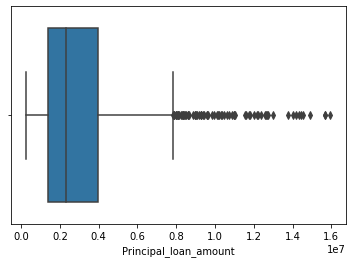

In [46]:
sns.boxplot(x="Principal_loan_amount", data=df_new)

There are outliers so

In [47]:
Q1 = df_new['Principal_loan_amount'].quantile(0.25)
Q3 = df_new['Principal_loan_amount'].quantile(0.75)
IQR = Q3 - Q1

In [48]:
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
print('low_limit is', low_lim)
print('up_limit is', up_lim)

low_limit is -2517250.0
up_limit is 7832750.0


In [49]:
df_new=df_new.loc[(df_new['Principal_loan_amount'] > low_lim) & (df_new['Principal_loan_amount'] < up_lim)]

In [50]:
df_new.shape

(918, 23)

0.07% is outlier, hence we can remove it

# EDA

## Categorical and numerical columns

In [51]:

categorical_columns = df_new.select_dtypes(include=['object'])
categorical_columns=categorical_columns.drop(['high_risk_applicant'], axis=1)
print(categorical_columns.shape)
print(categorical_columns.count())
cat_col=categorical_columns.columns


(918, 11)
Gender               918
Marital_status       918
Housing              918
Employment_status    918
Foreign_worker       918
SA_balance_type      918
Purpose              918
Property             918
Has_coapplicant      918
Has_guarantor        918
Loan_history         918
dtype: int64


In [52]:
cat_col

Index(['Gender', 'Marital_status', 'Housing', 'Employment_status',
       'Foreign_worker', 'SA_balance_type', 'Purpose', 'Property',
       'Has_coapplicant', 'Has_guarantor', 'Loan_history'],
      dtype='object')

In [53]:
numerical_columns = df_new.select_dtypes(include=['int64'])
print(numerical_columns.shape)
print(numerical_columns.count())
num_col=numerical_columns.columns

(918, 11)
Primary_applicant_age_in_years                              918
Number_of_dependents                                        918
Years_at_current_residence                                  918
Employed_for_at_least_years                                 918
Employed_for_at_most_years                                  918
Balance_in_existing_bank_account_(lower_limit_of_bucket)    918
Balance_in_existing_bank_account_(upper_limit_of_bucket)    918
Months_loan_taken_for                                       918
Principal_loan_amount                                       918
EMI_rate_in_percentage_of_disposable_income                 918
Number_of_existing_loans_at_this_bank                       918
dtype: int64


## Splitting the data on bases of applicant being high and low risked in order to calculate the percentage of particular entity wrt high/low risk and understanding its importance as a feature

In [54]:
# splitting the dataset based on high and low risk applicant
df_y=df_new[df_new['high_risk_applicant']=='yes']
df_n=df_new[df_new['high_risk_applicant']!='yes']

In [55]:
def calculate_percentage_n(column):
    # For yes category of high applicant
    array_new = dict(df_n[column].value_counts())
    sum_v = 0
    for i,v in array_new.items():
        sum_v = sum_v+v
    for i,v in array_new.items():
        percent = (v/sum_v)*100
        percent=round(percent,2)
        print("The percentage of "+str(i)+" for low risk type in this column is:"+str(percent)+" %")
    
    # For no category of high applicant
    array_new = dict(df_y[column].value_counts())
    sum_v = 0
    for i,v in array_new.items():
        sum_v = sum_v+v
    for i,v in array_new.items():
        percent = (v/sum_v)*100
        percent=round(percent,2)
        print("The percentage of "+str(i)+" for high risk type in this column is:"+str(percent)+" %")  

## categorical

### Gender 

The percentage of male for low risk type in this column is:70.76 %
The percentage of female for low risk type in this column is:29.24 %
The percentage of male for high risk type in this column is:62.02 %
The percentage of female for high risk type in this column is:37.98 %


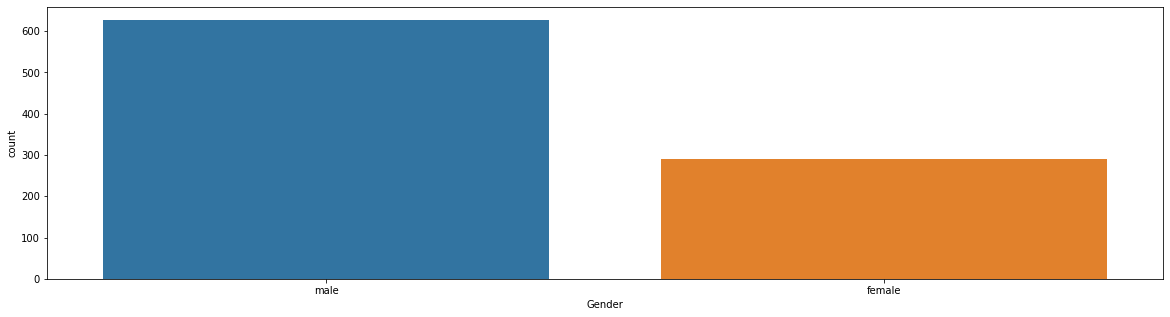

In [56]:
# for i in range(len(cat_col)):
plt.figure(figsize=(20,5))
sns.countplot(x =cat_col[0], data = df_new)
calculate_percentage_n(cat_col[0])



<AxesSubplot:xlabel='Gender', ylabel='count'>

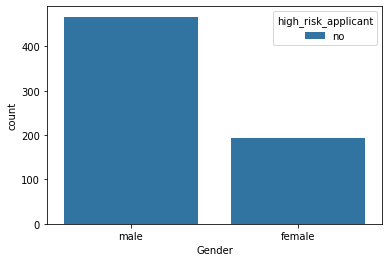

In [57]:
sns.countplot(x=cat_col[0], hue="high_risk_applicant", data=df_n)


<AxesSubplot:xlabel='Gender', ylabel='count'>

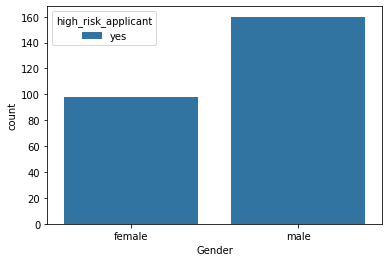

In [58]:
sns.countplot(x=cat_col[0], hue="high_risk_applicant", data=df_y)

Observations:
* chances for getting loan for male is easier compared to male
* From percentages, chances of female loan to get rejected is comparatively increased


### Martial status

The percentage of single for low risk type in this column is:56.36 %
The percentage of divorced/separated/married for low risk type in this column is:29.24 %
The percentage of married/widowed for low risk type in this column is:10.15 %
The percentage of divorced/separated for low risk type in this column is:4.24 %
The percentage of single for high risk type in this column is:46.12 %
The percentage of divorced/separated/married for high risk type in this column is:37.98 %
The percentage of married/widowed for high risk type in this column is:9.3 %
The percentage of divorced/separated for high risk type in this column is:6.59 %


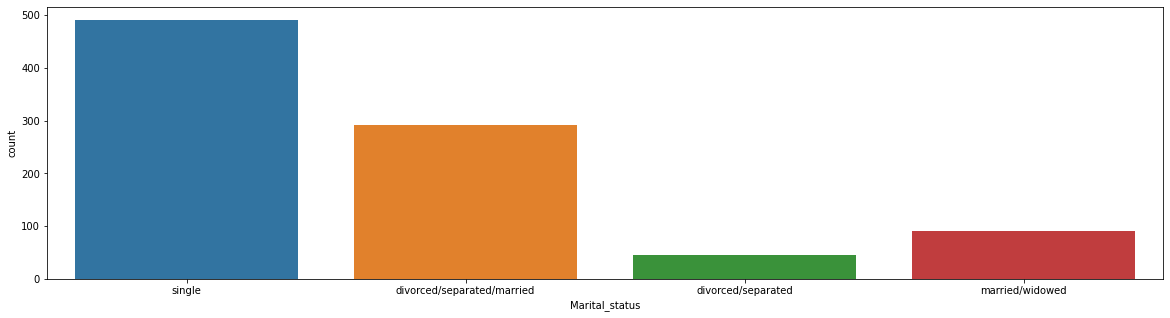

In [59]:
# for i in range(len(cat_col)):
plt.figure(figsize=(20,5))
sns.countplot(x =cat_col[1], data = df_new)
calculate_percentage_n(cat_col[1])


<AxesSubplot:xlabel='Marital_status', ylabel='count'>

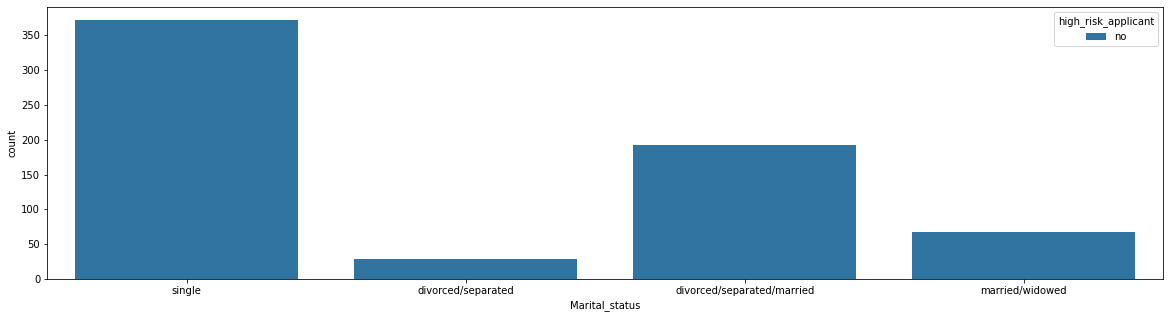

In [60]:
plt.figure(figsize=(20,5))
sns.countplot(x=cat_col[1], hue="high_risk_applicant", data=df_n)

<AxesSubplot:xlabel='Marital_status', ylabel='count'>

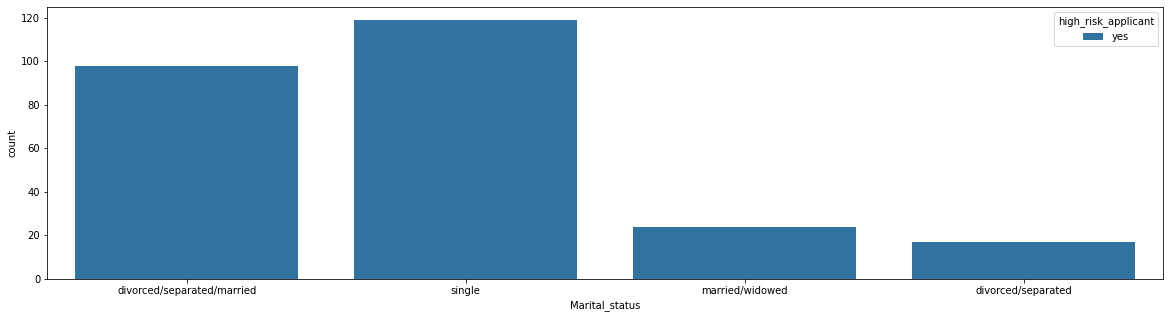

In [61]:
plt.figure(figsize=(20,5))
sns.countplot(x=cat_col[1], hue="high_risk_applicant", data=df_y)

Observations:
* Chances of single status,married/widowed are higher
* divorced/separated/married, divorced/separated status are likely to be rejected (comparing percentage)


### Housing

The percentage of own for low risk type in this column is:76.06 %
The percentage of rent for low risk type in this column is:16.21 %
The percentage of for free for low risk type in this column is:7.73 %
The percentage of own for high risk type in this column is:63.18 %
The percentage of rent for high risk type in this column is:24.42 %
The percentage of for free for high risk type in this column is:12.4 %


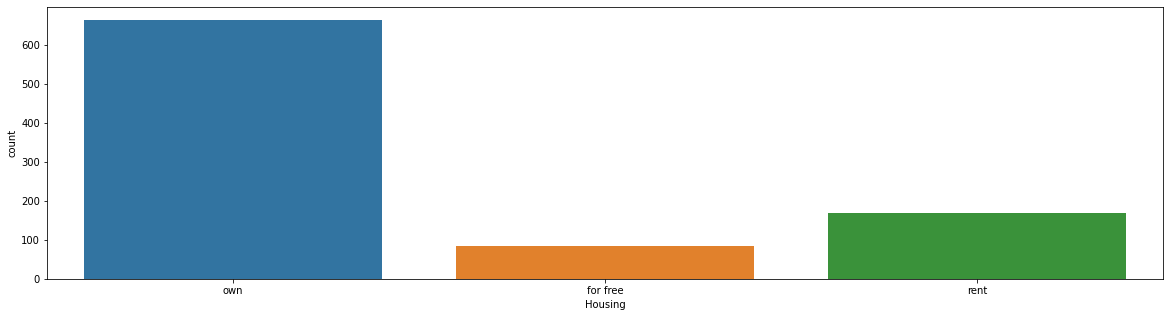

In [62]:
# for i in range(len(cat_col)):
plt.figure(figsize=(20,5))
sns.countplot(x =cat_col[2], data = df_new)
calculate_percentage_n(cat_col[2])

<AxesSubplot:xlabel='Housing', ylabel='count'>

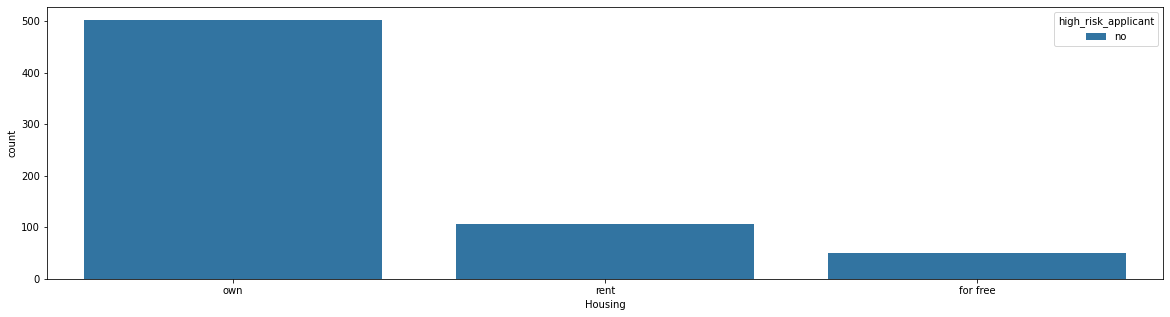

In [63]:
plt.figure(figsize=(20,5))
sns.countplot(x=cat_col[2], hue="high_risk_applicant", data=df_n)

<AxesSubplot:xlabel='Housing', ylabel='count'>

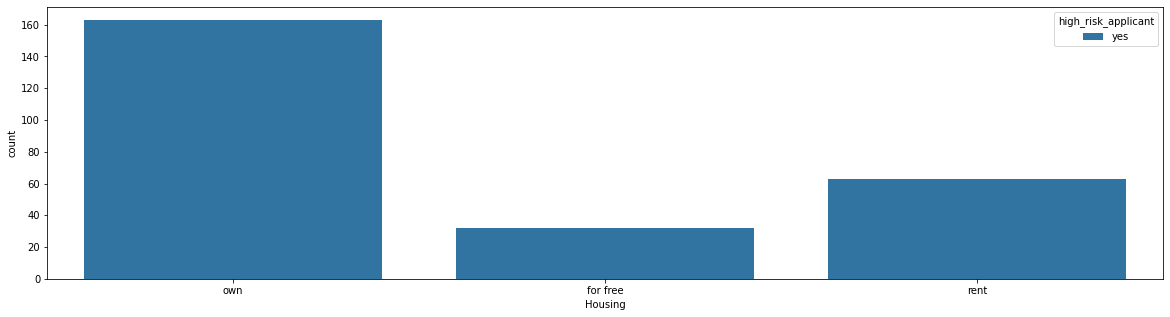

In [64]:
plt.figure(figsize=(20,5))
sns.countplot(x=cat_col[2], hue="high_risk_applicant", data=df_y)

Observations:
* Person with own house has higher chance of getting loan
* For free housing, rent are at low chance of getting


### Employment status

The percentage of skilled employee / official for low risk type in this column is:64.55 %
The percentage of unskilled - resident for low risk type in this column is:21.06 %
The percentage of management / self-employed / highly qualified employee / officer for low risk type in this column is:12.27 %
The percentage of unemployed / unskilled - non-resident for low risk type in this column is:2.12 %
The percentage of skilled employee / official for high risk type in this column is:64.73 %
The percentage of unskilled - resident for high risk type in this column is:20.93 %
The percentage of management / self-employed / highly qualified employee / officer for high risk type in this column is:12.02 %
The percentage of unemployed / unskilled - non-resident for high risk type in this column is:2.33 %


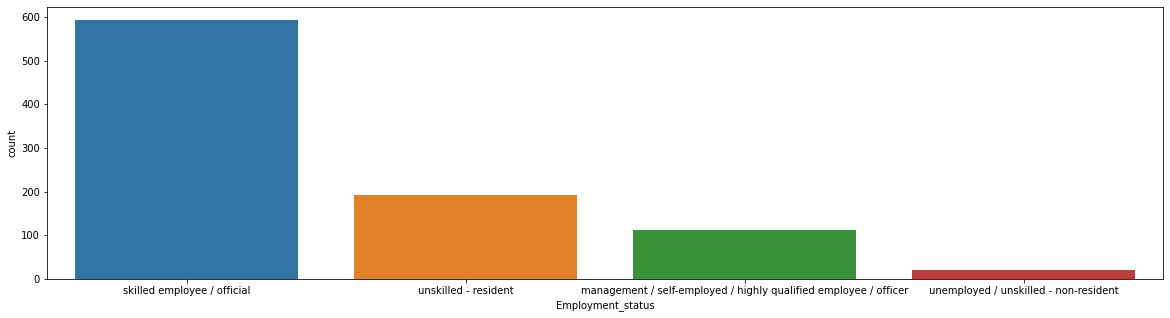

In [65]:
# for i in range(len(cat_col)):
plt.figure(figsize=(20,5))
sns.countplot(x =cat_col[3], data = df_new)
calculate_percentage_n(cat_col[3])

<AxesSubplot:xlabel='Employment_status', ylabel='count'>

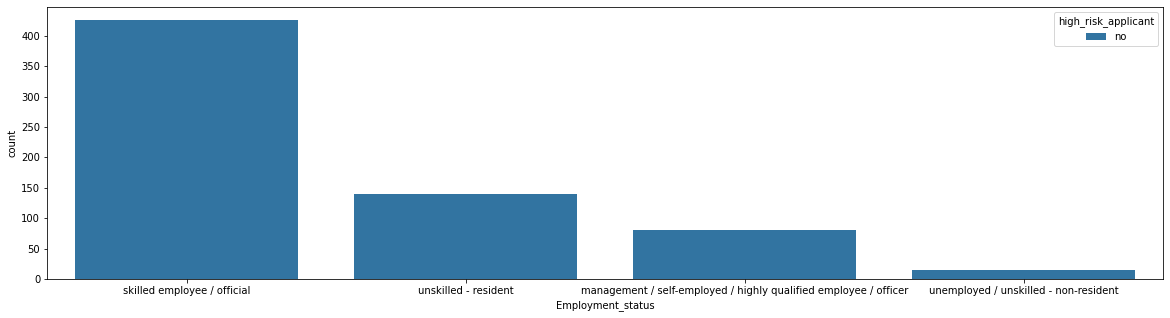

In [66]:
plt.figure(figsize=(20,5))
sns.countplot(x=cat_col[3], hue="high_risk_applicant", data=df_n)

<AxesSubplot:xlabel='Employment_status', ylabel='count'>

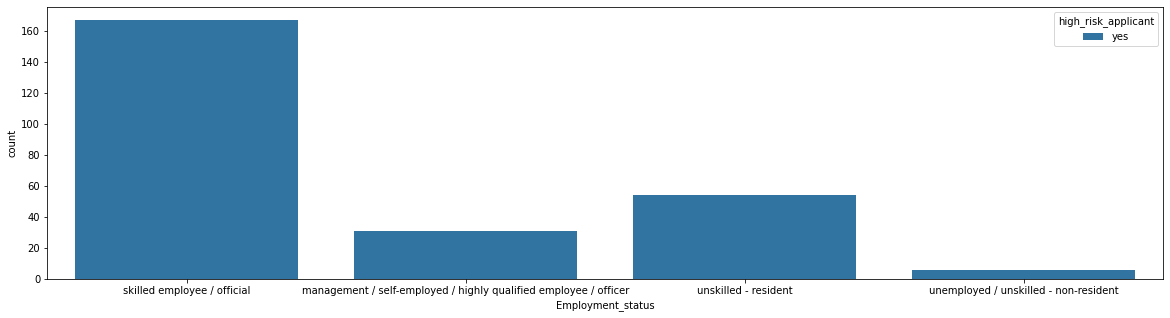

In [67]:
plt.figure(figsize=(20,5))
sns.countplot(x=cat_col[3], hue="high_risk_applicant", data=df_y)

Observation:
* Here there is no major change in percentage for likely hood of person being in high or low risk applicant 
* Hence, feature should be dropped

### Foreign Worker

The percentage of yes for low risk type in this column is:95.0 %
The percentage of no for low risk type in this column is:5.0 %
The percentage of yes for high risk type in this column is:99.22 %
The percentage of no for high risk type in this column is:0.78 %


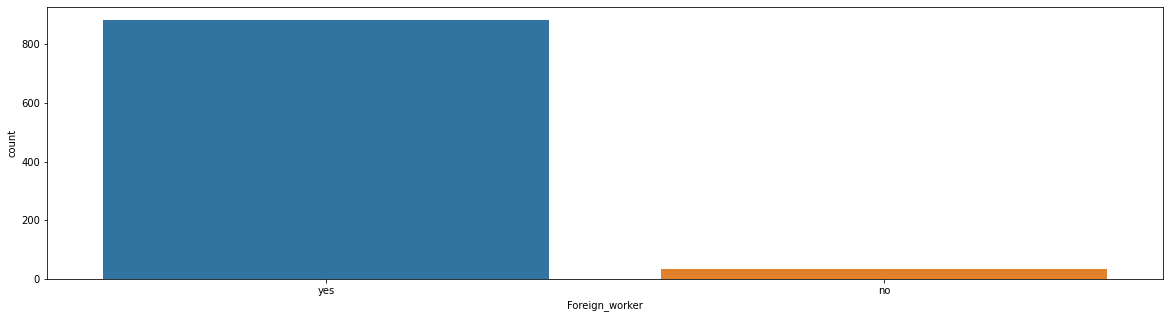

In [68]:
# for i in range(len(cat_col)):
plt.figure(figsize=(20,5))
sns.countplot(x =cat_col[4], data = df_new)
calculate_percentage_n(cat_col[4])

<AxesSubplot:xlabel='Foreign_worker', ylabel='count'>

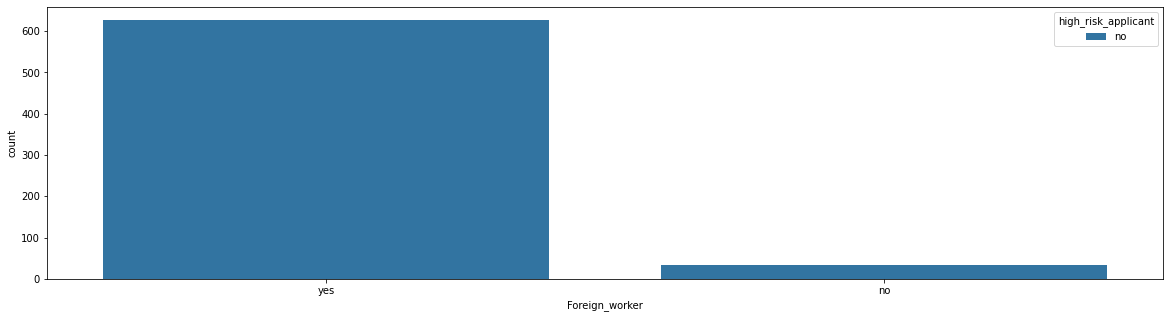

In [69]:
plt.figure(figsize=(20,5))
sns.countplot(x=cat_col[4], hue="high_risk_applicant", data=df_n)

<AxesSubplot:xlabel='Foreign_worker', ylabel='count'>

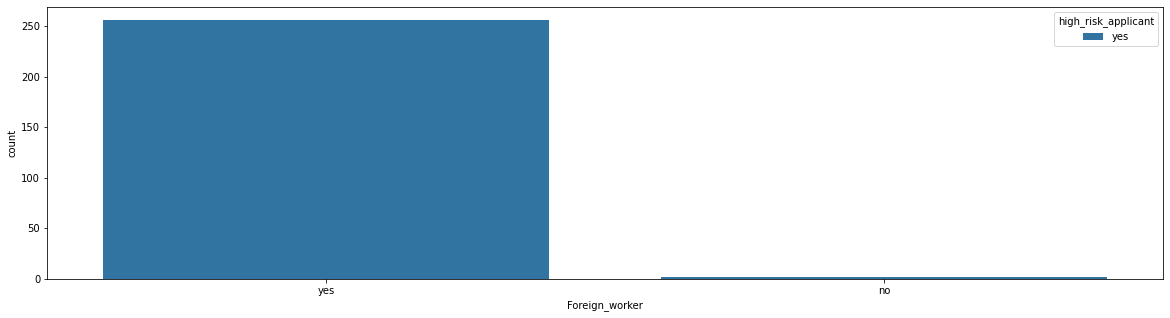

In [70]:
plt.figure(figsize=(20,5))
sns.countplot(x=cat_col[4], hue="high_risk_applicant", data=df_y)

Observation:
* The person being a foreign worker has higher chance of being rejected when comparing the percentages


### Savings account balance type

The percentage of Low for low risk type in this column is:56.21 %
The percentage of Not known for low risk type in this column is:20.3 %
The percentage of Medium for low risk type in this column is:9.7 %
The percentage of High for low risk type in this column is:7.58 %
The percentage of Very high for low risk type in this column is:6.21 %
The percentage of Low for high risk type in this column is:72.87 %
The percentage of Medium for high risk type in this column is:11.24 %
The percentage of Not known for high risk type in this column is:10.08 %
The percentage of High for high risk type in this column is:3.88 %
The percentage of Very high for high risk type in this column is:1.94 %


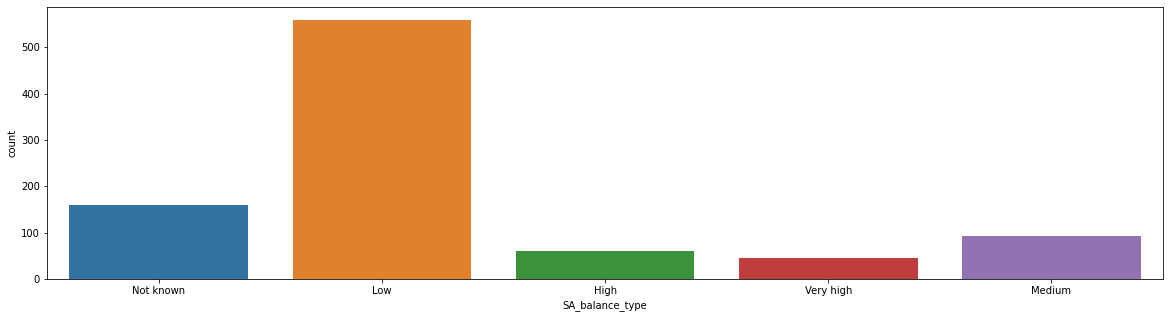

In [71]:
# for i in range(len(cat_col)):
plt.figure(figsize=(20,5))
sns.countplot(x =cat_col[5], data = df_new)
calculate_percentage_n(cat_col[5])

<AxesSubplot:xlabel='SA_balance_type', ylabel='count'>

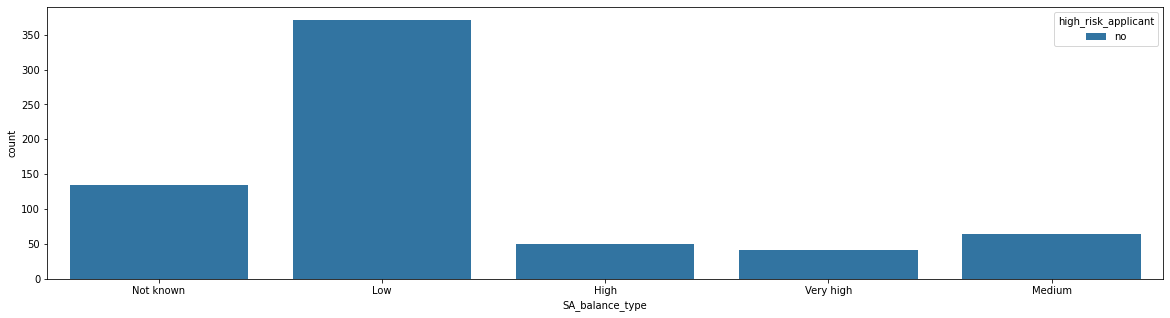

In [72]:
plt.figure(figsize=(20,5))
sns.countplot(x=cat_col[5], hue="high_risk_applicant", data=df_n)

<AxesSubplot:xlabel='SA_balance_type', ylabel='count'>

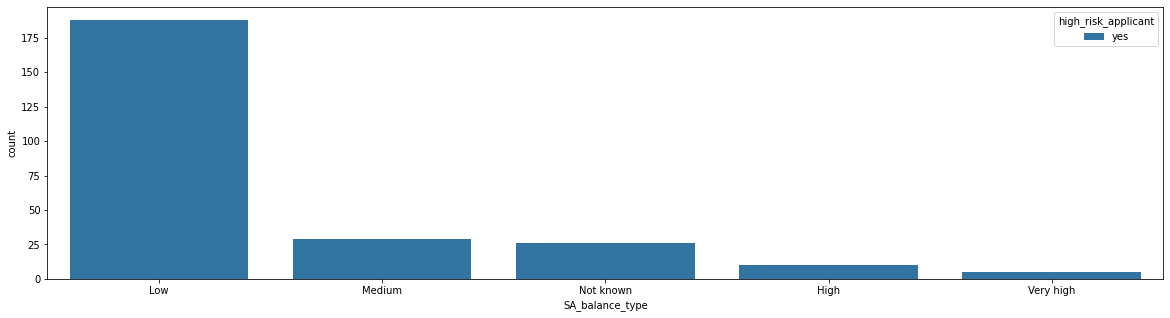

In [73]:
plt.figure(figsize=(20,5))
sns.countplot(x=cat_col[5], hue="high_risk_applicant", data=df_y)

Observations:
* Person with type Low, Medium: higher chances of being high risk applicant comapred to very high and high balance type since high_risk percentages fall drastically for them

### Purpose for which loan was taken

The percentage of electronic equipment for low risk type in this column is:32.12 %
The percentage of new vehicle for low risk type in this column is:20.91 %
The percentage of FF&E for low risk type in this column is:18.33 %
The percentage of used vehicle for low risk type in this column is:11.21 %
The percentage of business for low risk type in this column is:9.09 %
The percentage of education for low risk type in this column is:3.79 %
The percentage of repair costs for low risk type in this column is:2.12 %
The percentage of domestic appliances for low risk type in this column is:1.21 %
The percentage of career development for low risk type in this column is:1.21 %
The percentage of new vehicle for high risk type in this column is:30.23 %
The percentage of electronic equipment for high risk type in this column is:23.64 %
The percentage of FF&E for high risk type in this column is:20.54 %
The percentage of business for high risk type in this column is:10.08 %
The percentage of educatio

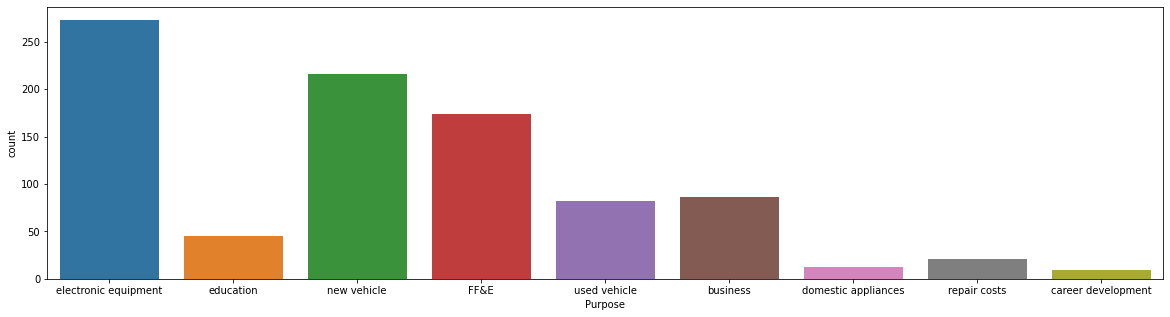

In [74]:
# for i in range(len(cat_col)):
plt.figure(figsize=(20,5))
sns.countplot(x =cat_col[6], data = df_new)
calculate_percentage_n(cat_col[6])

<AxesSubplot:xlabel='Purpose', ylabel='count'>

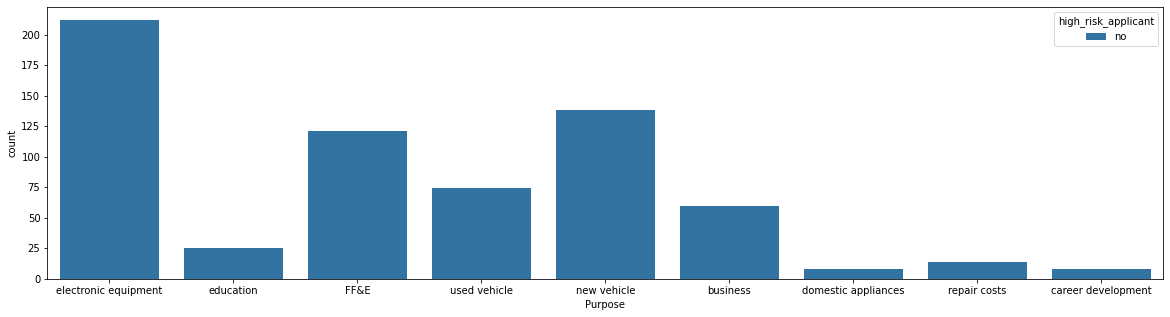

In [75]:
plt.figure(figsize=(20,5))
sns.countplot(x=cat_col[6], hue="high_risk_applicant", data=df_n)

<AxesSubplot:xlabel='Purpose', ylabel='count'>

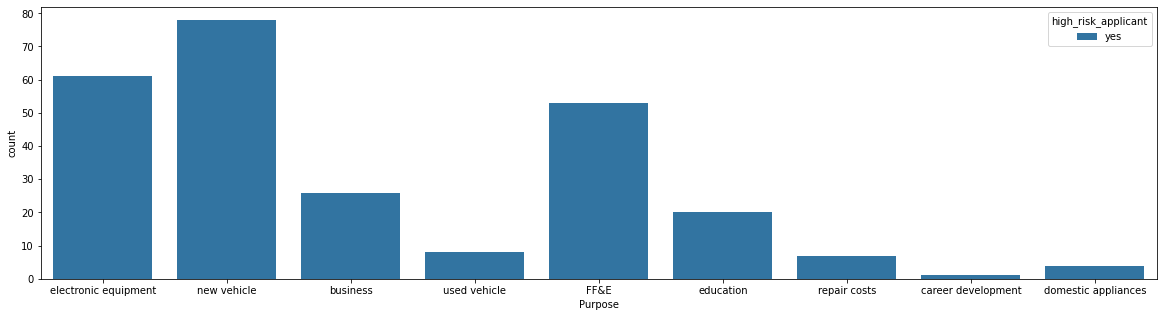

In [76]:
plt.figure(figsize=(20,5))
sns.countplot(x=cat_col[6], hue="high_risk_applicant", data=df_y)

Observations:
* Likely to be approved for: electronic-equ.,used vehicle, career development for rest chances of high risk applicant are more

### Property

The percentage of real estate for low risk type in this column is:33.18 %
The percentage of car or other for low risk type in this column is:32.27 %
The percentage of building society savings agreement/life insurance for low risk type in this column is:23.48 %
The percentage of Nothing for low risk type in this column is:11.06 %
The percentage of car or other for high risk type in this column is:32.95 %
The percentage of building society savings agreement/life insurance for high risk type in this column is:25.58 %
The percentage of real estate for high risk type in this column is:22.87 %
The percentage of Nothing for high risk type in this column is:18.6 %


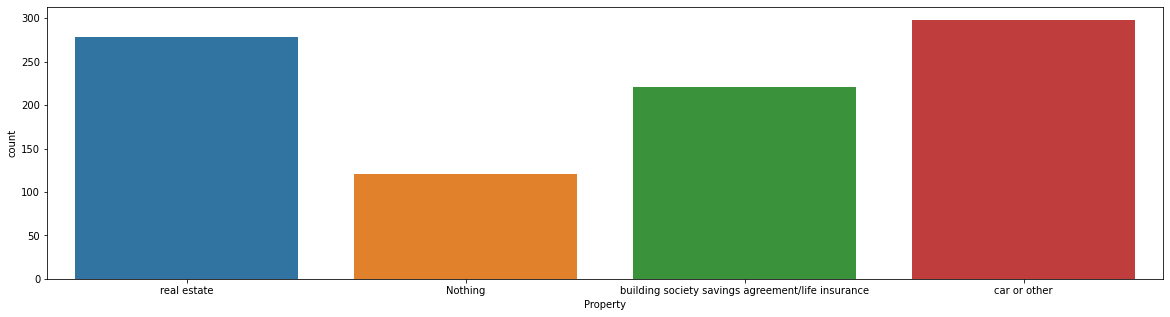

In [77]:
# for i in range(len(cat_col)):
plt.figure(figsize=(20,5))
sns.countplot(x =cat_col[7], data = df_new)
calculate_percentage_n(cat_col[7])

<AxesSubplot:xlabel='Property', ylabel='count'>

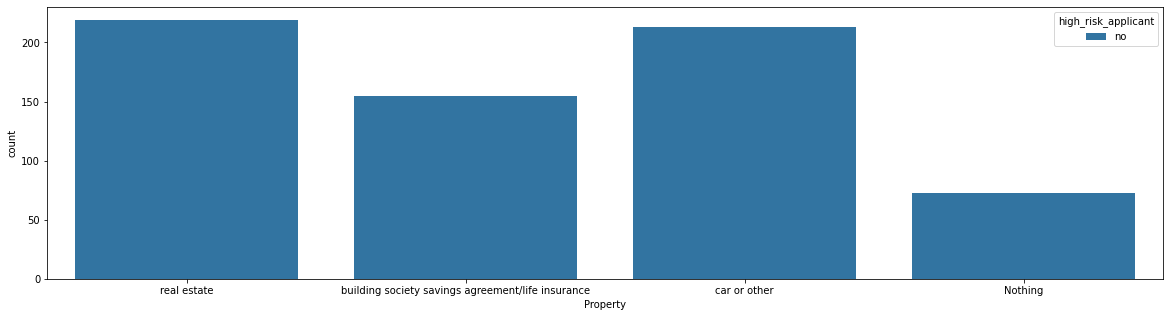

In [78]:
plt.figure(figsize=(20,5))
sns.countplot(x=cat_col[7], hue="high_risk_applicant", data=df_n)

<AxesSubplot:xlabel='Property', ylabel='count'>

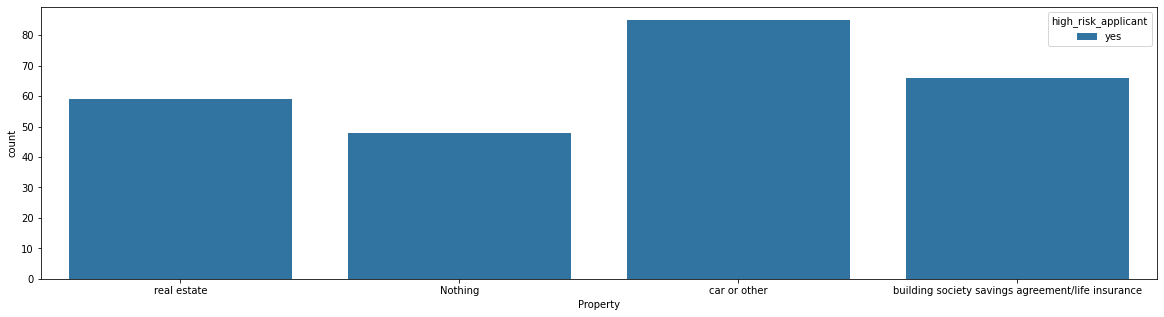

In [79]:
plt.figure(figsize=(20,5))
sns.countplot(x=cat_col[7], hue="high_risk_applicant", data=df_y)

Observation:
* Low risk applicant are one's whose property lies as: real estate
* For car, building society savings agreeemnt/life insurance nothing can be predicted equal chaances are there
* Nothing has likely hood of high risk applicant

### Has coapplicant

The percentage of no for low risk type in this column is:96.97 %
The percentage of yes for low risk type in this column is:3.03 %
The percentage of no for high risk type in this column is:94.57 %
The percentage of yes for high risk type in this column is:5.43 %


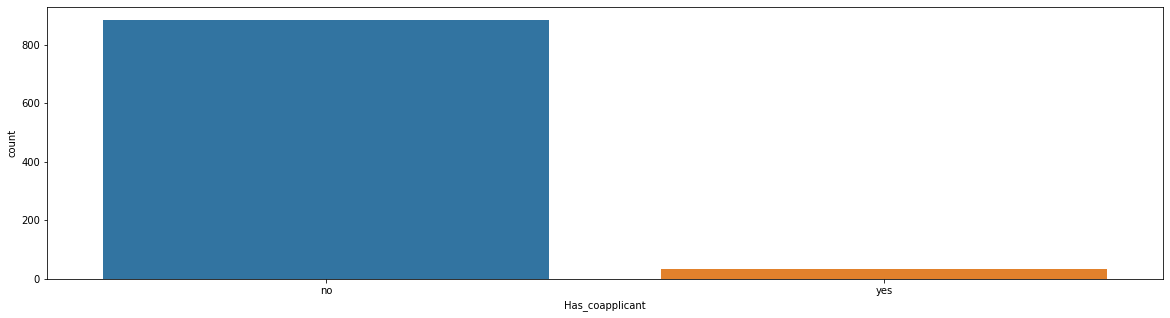

In [80]:
# for i in range(len(cat_col)):
plt.figure(figsize=(20,5))
sns.countplot(x =cat_col[8], data = df_new)
calculate_percentage_n(cat_col[8])

<AxesSubplot:xlabel='Has_coapplicant', ylabel='count'>

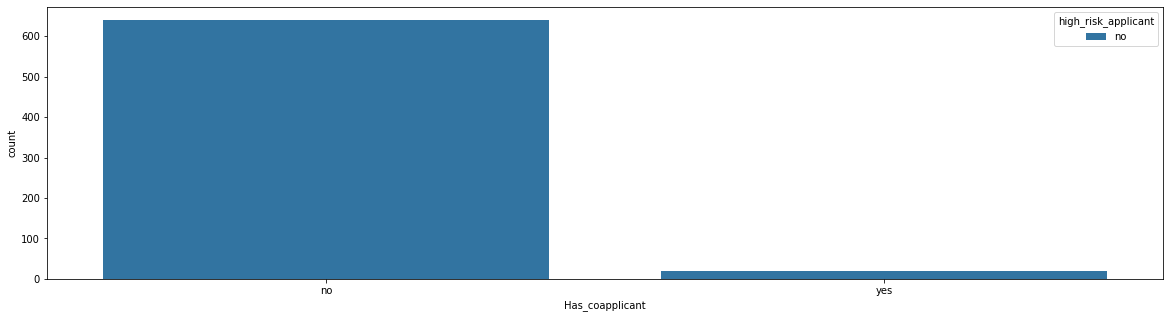

In [81]:
plt.figure(figsize=(20,5))
sns.countplot(x=cat_col[8], hue="high_risk_applicant", data=df_n)

<AxesSubplot:xlabel='Has_coapplicant', ylabel='count'>

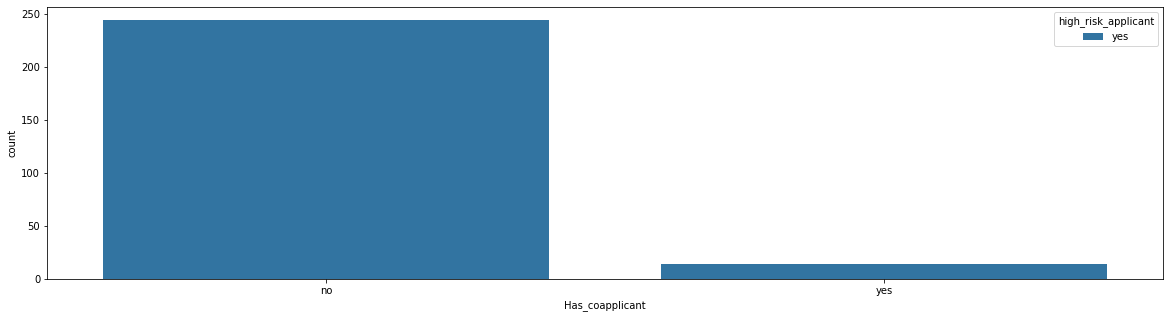

In [82]:
plt.figure(figsize=(20,5))
sns.countplot(x=cat_col[8], hue="high_risk_applicant", data=df_y)

Observations:
* For coapplicant as no chances are higher of getting classified as low risk applicant compared to has coapplicant

### Has_guarantor

The percentage of no for low risk type in this column is:93.94 %
The percentage of yes for low risk type in this column is:6.06 %
The percentage of no for high risk type in this column is:96.12 %
The percentage of yes for high risk type in this column is:3.88 %


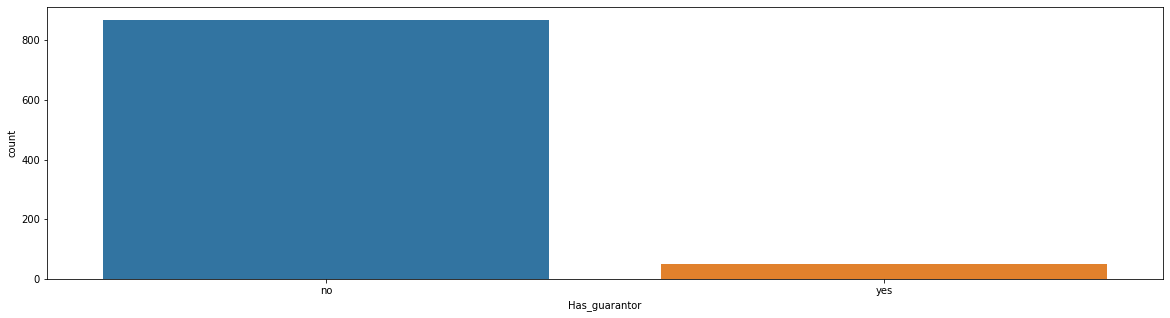

In [83]:
# for i in range(len(cat_col)):
plt.figure(figsize=(20,5))
sns.countplot(x =cat_col[9], data = df_new)
calculate_percentage_n(cat_col[9])

<AxesSubplot:xlabel='Has_guarantor', ylabel='count'>

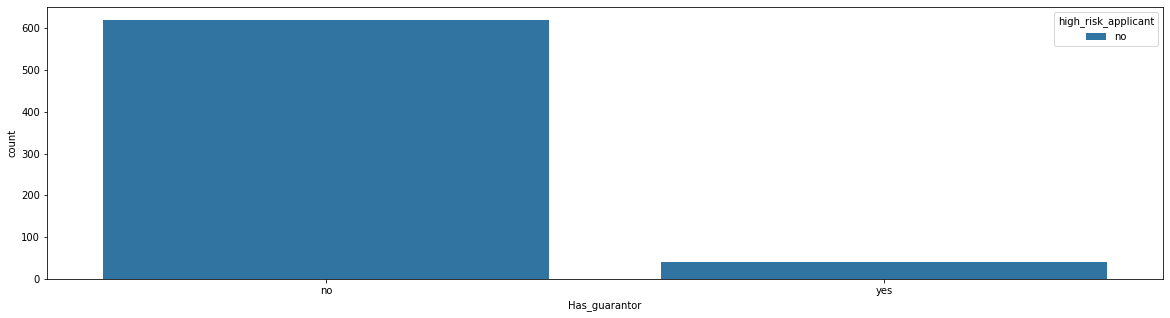

In [84]:
plt.figure(figsize=(20,5))
sns.countplot(x=cat_col[9], hue="high_risk_applicant", data=df_n)

<AxesSubplot:xlabel='Has_guarantor', ylabel='count'>

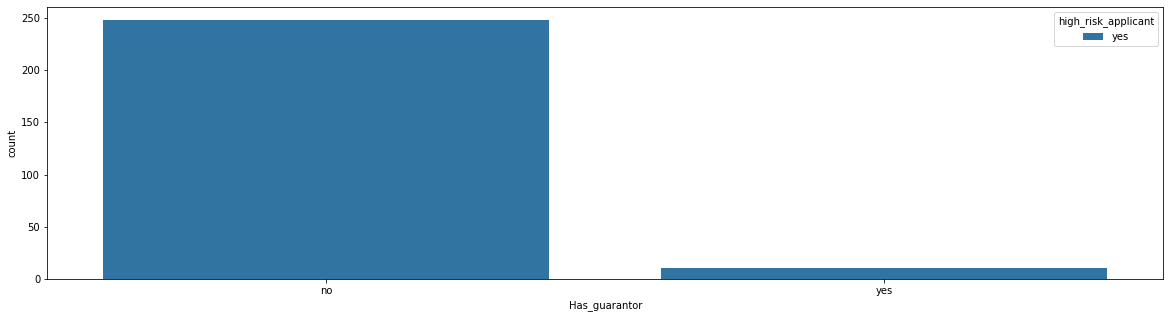

In [85]:
plt.figure(figsize=(20,5))
sns.countplot(x=cat_col[9], hue="high_risk_applicant", data=df_y)

Observation:
* If there is no gurantor that person has higher chance of categorized as high risk compared to with gurantor, which is but obvious

### Loan History

The percentage of existing loans paid back duly till now for low risk type in this column is:52.58 %
The percentage of critical/pending loans at other banks for low risk type in this column is:35.45 %
The percentage of delay in paying off loans in the past for low risk type in this column is:7.42 %
The percentage of all loans at this bank paid back duly for low risk type in this column is:2.88 %
The percentage of no loans taken/all loans paid back duly for low risk type in this column is:1.67 %
The percentage of existing loans paid back duly till now for high risk type in this column is:56.59 %
The percentage of critical/pending loans at other banks for high risk type in this column is:16.28 %
The percentage of all loans at this bank paid back duly for high risk type in this column is:10.08 %
The percentage of delay in paying off loans in the past for high risk type in this column is:9.3 %
The percentage of no loans taken/all loans paid back duly for high risk type in this column is:7.

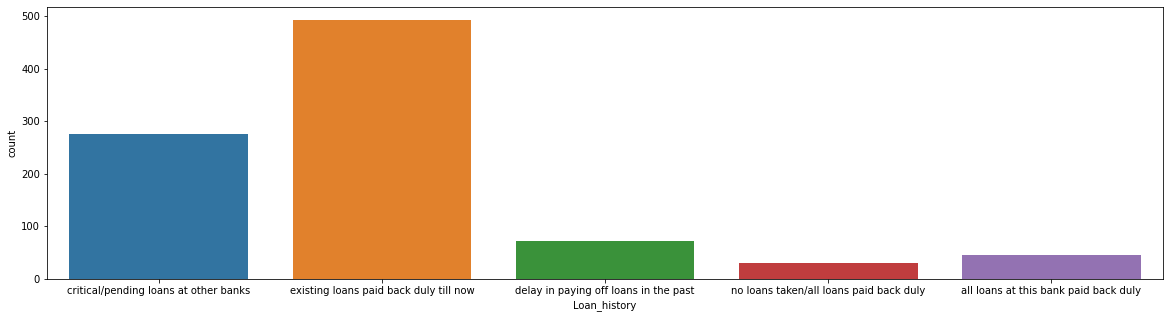

In [86]:
# for i in range(len(cat_col)):
plt.figure(figsize=(20,5))
sns.countplot(x =cat_col[10], data = df_new)
calculate_percentage_n(cat_col[10])

<AxesSubplot:xlabel='Loan_history', ylabel='count'>

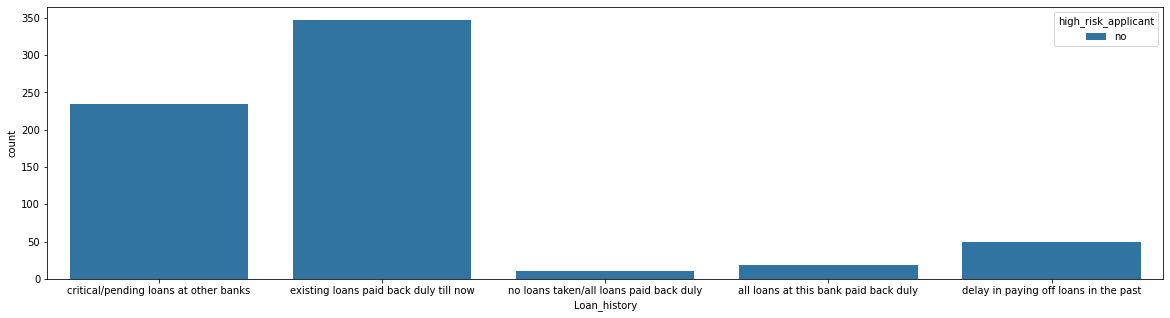

In [87]:
plt.figure(figsize=(20,5))
sns.countplot(x=cat_col[10], hue="high_risk_applicant", data=df_n)

<AxesSubplot:xlabel='Loan_history', ylabel='count'>

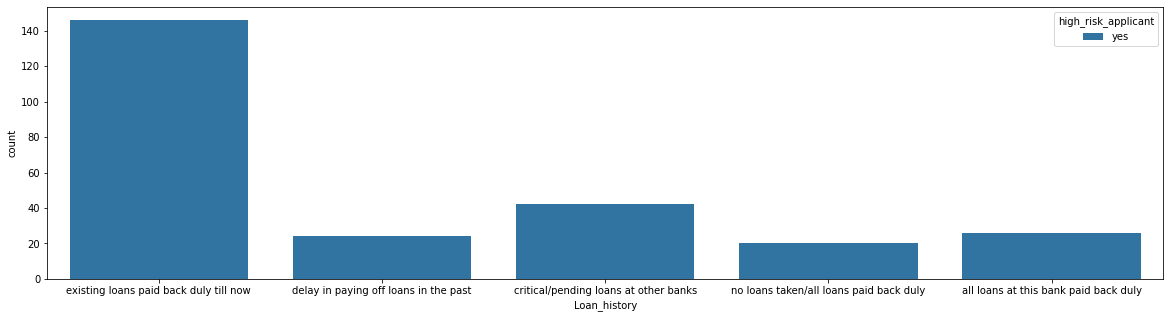

In [88]:
plt.figure(figsize=(20,5))
sns.countplot(x=cat_col[10], hue="high_risk_applicant", data=df_y)

Observation:
* The observations seems wrong to me, all loans paid back duly shows higher chance of categorized at high risk rather should be low risked, hence dropping this column

## numerical

### Primary Applicants age

<AxesSubplot:xlabel='high_risk_applicant', ylabel='Primary_applicant_age_in_years'>

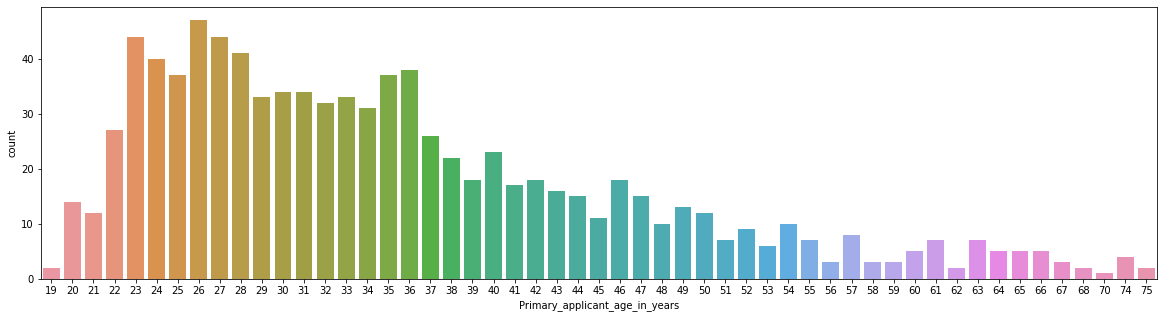

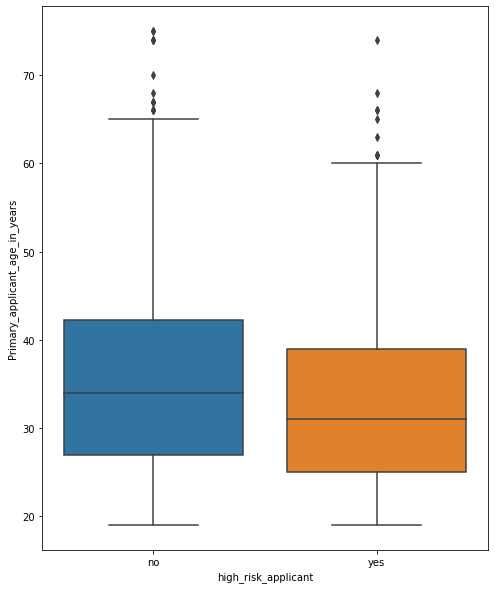

In [89]:
# for i in range(len(cat_col)):
plt.figure(figsize=(20,5))
sns.countplot(x =num_col[0], data = df_new)
# calculate_percentage_n(num_col[0])
plt.figure(figsize=(8,10))
sns.boxplot(x="high_risk_applicant",y=num_col[0], data=df_new)

Observation:
* Applicant with age around 35 are low risk compared to people younger than it

### Dependents


The percentage of 1 for low risk type in this column is:84.7 %
The percentage of 2 for low risk type in this column is:15.3 %
The percentage of 1 for high risk type in this column is:83.72 %
The percentage of 2 for high risk type in this column is:16.28 %


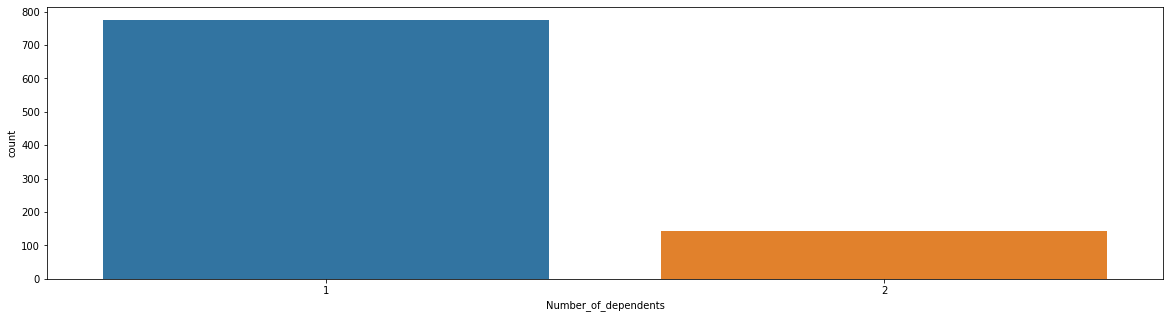

In [90]:
# for i in range(len(cat_col)):
plt.figure(figsize=(20,5))
sns.countplot(x =num_col[1], data = df_new)
calculate_percentage_n(num_col[1])

Observations:
* Person with 1 dependent on it are considered low risk compared to 2 dependent on them
* Although, difference in categorising in risk is not much -> so column can be dropped

### Year at current residence

The percentage of 4 for low risk type in this column is:41.52 %
The percentage of 2 for low risk type in this column is:29.85 %
The percentage of 3 for low risk type in this column is:15.0 %
The percentage of 1 for low risk type in this column is:13.64 %
The percentage of 4 for high risk type in this column is:40.7 %
The percentage of 2 for high risk type in this column is:31.4 %
The percentage of 3 for high risk type in this column is:15.5 %
The percentage of 1 for high risk type in this column is:12.4 %


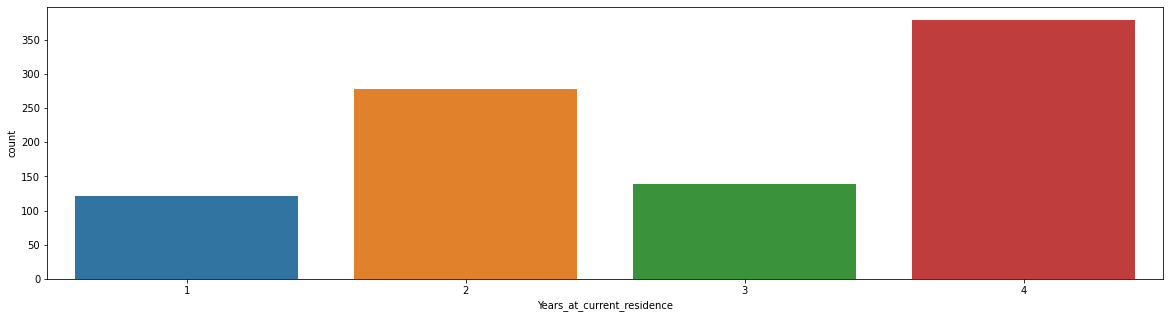

In [91]:
# for i in range(len(cat_col)):
plt.figure(figsize=(20,5))
sns.countplot(x =num_col[2], data = df_new)
calculate_percentage_n(num_col[2])

<AxesSubplot:xlabel='high_risk_applicant', ylabel='Years_at_current_residence'>

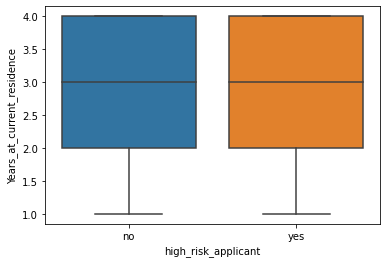

In [92]:
sns.boxplot(x="high_risk_applicant",y=num_col[2], data=df_new)

Observation:
* Years as 4 and 1 are classified as low risk applicant however the difference in perecentage isn't much and from box plot as well it would be better to drop this column

### Employed years

#### At least

The percentage of 1 for low risk type in this column is:33.94 %
The percentage of 7 for low risk type in this column is:27.42 %
The percentage of 0 for low risk type in this column is:19.85 %
The percentage of 4 for low risk type in this column is:18.79 %
The percentage of 1 for high risk type in this column is:35.27 %
The percentage of 0 for high risk type in this column is:31.78 %
The percentage of 7 for high risk type in this column is:20.16 %
The percentage of 4 for high risk type in this column is:12.79 %


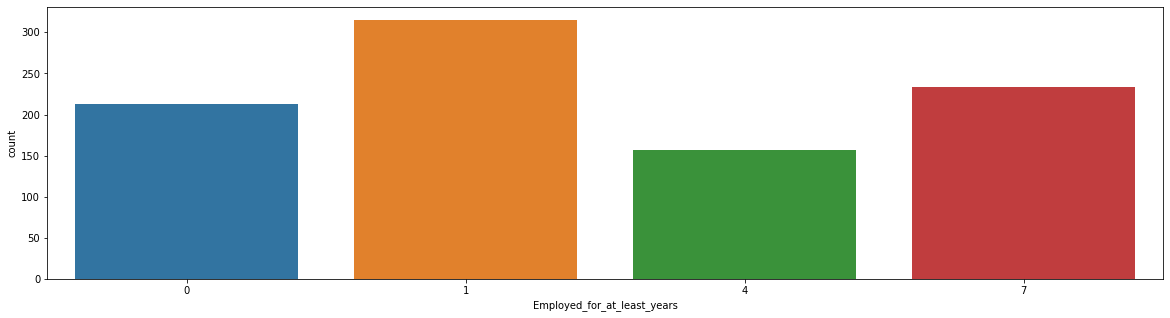

In [93]:
# for i in range(len(cat_col)):
plt.figure(figsize=(20,5))
sns.countplot(x =num_col[3], data = df_new)
calculate_percentage_n(num_col[3])

<AxesSubplot:xlabel='high_risk_applicant', ylabel='Employed_for_at_least_years'>

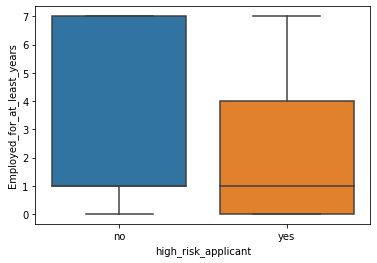

In [94]:
sns.boxplot(x="high_risk_applicant",y=num_col[3], data=df_new)

Observation:
* The person is considered at highest risk when employeed for atleast 0 or 1 year compared to atleast 4 and 7 years, it is obvious because if person is employeed for longer duration it can be assumed to have some more amount of money as savings

#### At most

The percentage of 4 for low risk type in this column is:33.94 %
The percentage of 0 for low risk type in this column is:32.42 %
The percentage of 7 for low risk type in this column is:18.79 %
The percentage of 1 for low risk type in this column is:14.85 %
The percentage of 4 for high risk type in this column is:35.27 %
The percentage of 0 for high risk type in this column is:27.91 %
The percentage of 1 for high risk type in this column is:24.03 %
The percentage of 7 for high risk type in this column is:12.79 %


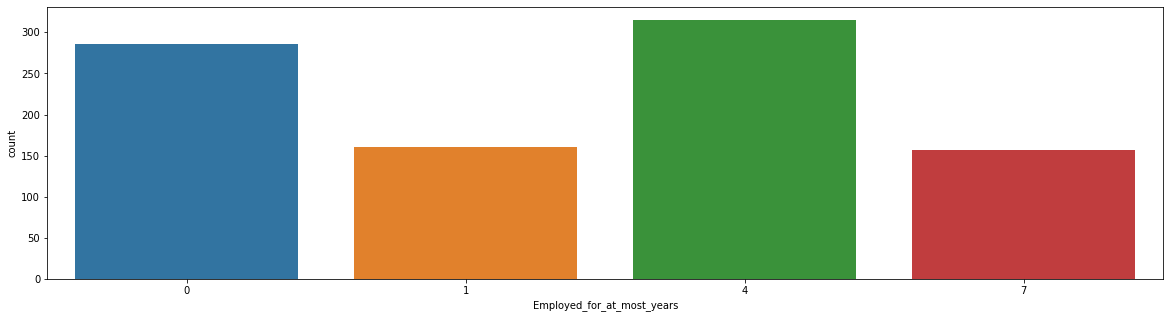

In [95]:
# for i in range(len(cat_col)):
plt.figure(figsize=(20,5))
sns.countplot(x =num_col[4], data = df_new)
calculate_percentage_n(num_col[4])

<AxesSubplot:xlabel='high_risk_applicant', ylabel='Employed_for_at_most_years'>

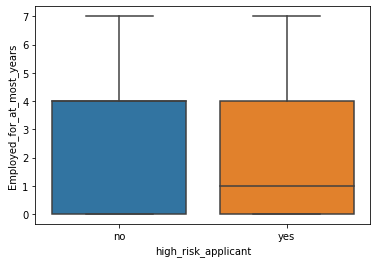

In [96]:
sns.boxplot(x="high_risk_applicant",y=num_col[4], data=df_new)

Observation:
* The columns seems skeptical since if atmost value for years is 0 than person has higher chance of categorized as low risk
* Such behavior can be also result of mis-management of missing valuesn hence dropping this column

### Current balance

#### Lower limit bucket

The percentage of 0 for low risk type in this column is:92.58 %
The percentage of 200000 for low risk type in this column is:7.42 %
The percentage of 0 for high risk type in this column is:94.57 %
The percentage of 200000 for high risk type in this column is:5.43 %


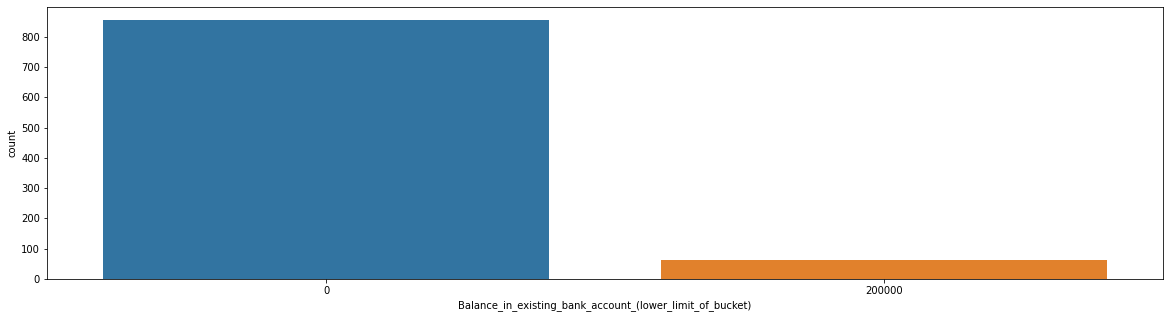

In [97]:
# for i in range(len(cat_col)):
plt.figure(figsize=(20,5))
sns.countplot(x =num_col[5], data = df_new)
calculate_percentage_n(num_col[5])

Observations:
* Person with lower limit bucket as 0 is considered at high risk


#### Upper limit bucket

The percentage of 0 for low risk type in this column is:76.97 %
The percentage of 200000 for low risk type in this column is:23.03 %
The percentage of 0 for high risk type in this column is:67.83 %
The percentage of 200000 for high risk type in this column is:32.17 %


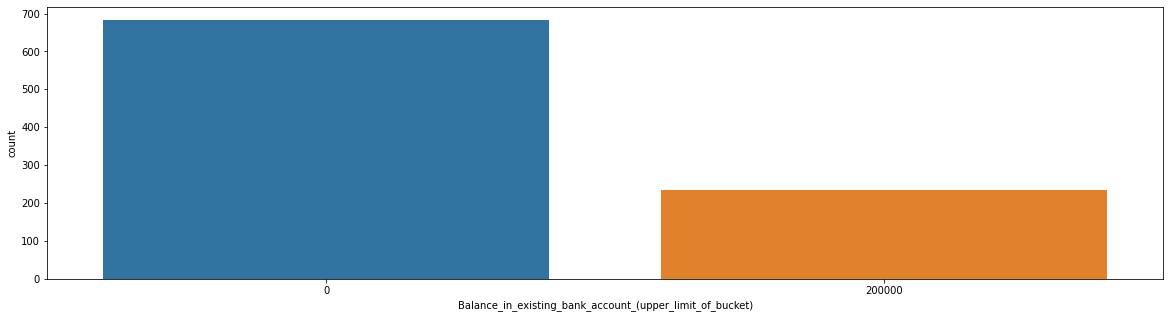

In [98]:
# for i in range(len(cat_col)):
plt.figure(figsize=(20,5))
sns.countplot(x =num_col[6], data = df_new)
calculate_percentage_n(num_col[6])

Observation:
* Person with 2 lac upper limit of bucket, seems to be at high risk

* Current balance with upper and lower limit bucket are out of my scope of understanding, hence we remove these columns 

### Months loan taken for

<AxesSubplot:xlabel='high_risk_applicant', ylabel='Months_loan_taken_for'>

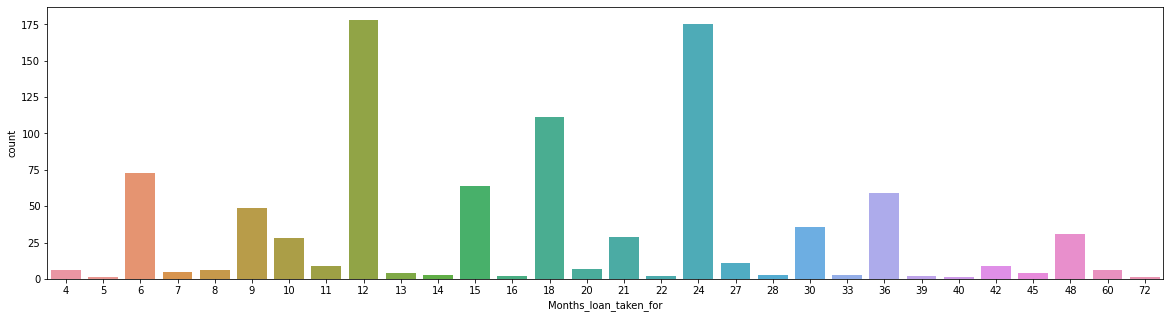

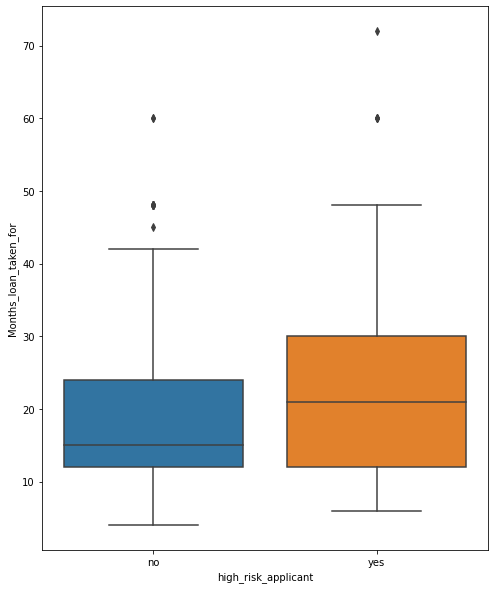

In [99]:
# for i in range(len(cat_col)):
plt.figure(figsize=(20,5))
sns.countplot(x =num_col[7], data = df_new)
# grid = sns.FacetGrid(df_new,col='high_risk_applicant', size=10.2, aspect=1.6)
# grid.map(sns.countplot, num_col[7])
plt.figure(figsize=(8,10))
sns.boxplot(x="high_risk_applicant",y="Months_loan_taken_for", data=df_new)
# calculate_percentage_n(num_col[7])

Observation:
* If the person has loan taken around for 15 months seems to be as low risk applicant and higher than that i.e. around 20 seems at high risk applicant

### principal loan amount

<AxesSubplot:xlabel='high_risk_applicant', ylabel='Principal_loan_amount'>

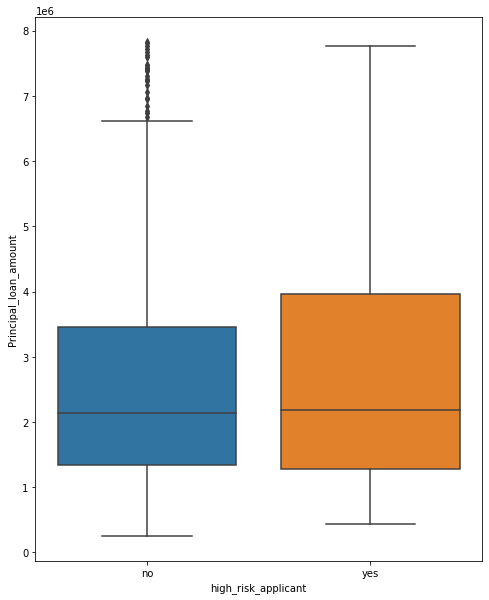

In [100]:

# plt.figure(figsize=(20,5))
# sns.countplot(x =num_col[8], data = df_new)
plt.figure(figsize=(8,10))
sns.boxplot(x="high_risk_applicant",y="Principal_loan_amount", data=df_new)

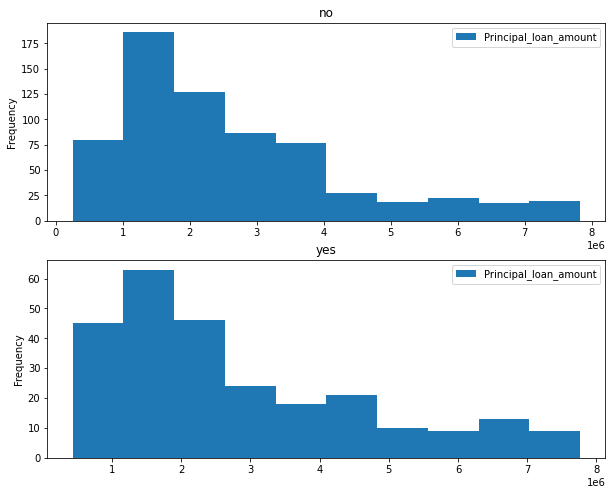

In [101]:
ax = df_new.plot.hist(column=num_col[8], by="high_risk_applicant", figsize=(10, 8))

Observation:
* For principal amount between 1 and 2 lac has higher chance of getting loan, however when considering low an high risk applicant nothing can be said

### EMI rate in percentage of disposal income

The percentage of 4 for low risk type in this column is:46.82 %
The percentage of 2 for low risk type in this column is:22.42 %
The percentage of 3 for low risk type in this column is:16.36 %
The percentage of 1 for low risk type in this column is:14.39 %
The percentage of 4 for high risk type in this column is:56.98 %
The percentage of 2 for high risk type in this column is:18.99 %
The percentage of 3 for high risk type in this column is:15.5 %
The percentage of 1 for high risk type in this column is:8.53 %


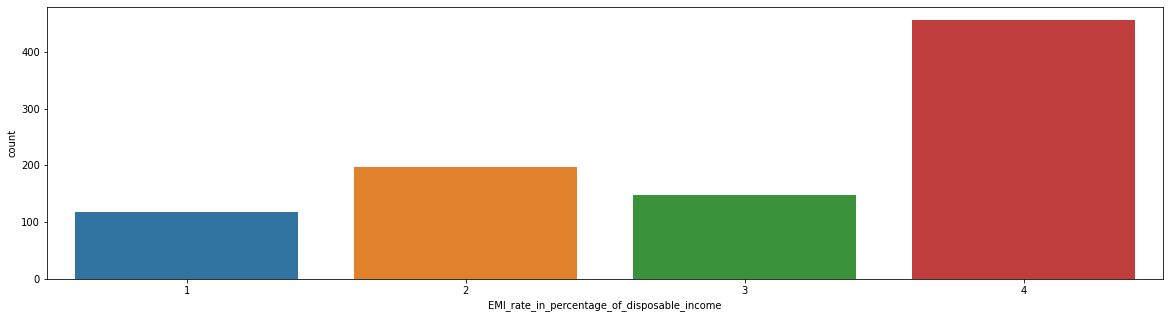

In [102]:
# for i in range(len(cat_col)):
plt.figure(figsize=(20,5))
sns.countplot(x =num_col[9], data = df_new)
calculate_percentage_n(num_col[9])

<AxesSubplot:xlabel='EMI_rate_in_percentage_of_disposable_income', ylabel='count'>

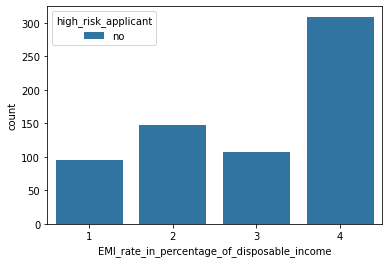

In [103]:
sns.countplot(x=num_col[9], hue="high_risk_applicant", data=df_n)

<AxesSubplot:xlabel='EMI_rate_in_percentage_of_disposable_income', ylabel='count'>

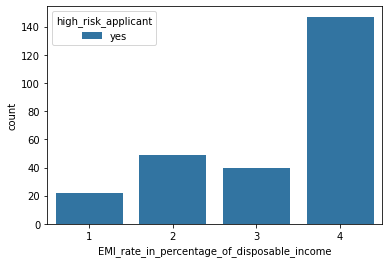

In [104]:
sns.countplot(x=num_col[9], hue="high_risk_applicant", data=df_y)

Observations:
*  For low EMI rate the person has higher chance of classified as low risk applicanti.e. for 1,2
*  For rate as 3, no great diff is found

### Number of existing loans

The percentage of 1 for low risk type in this column is:61.97 %
The percentage of 2 for low risk type in this column is:34.39 %
The percentage of 3 for low risk type in this column is:3.03 %
The percentage of 4 for low risk type in this column is:0.61 %
The percentage of 1 for high risk type in this column is:67.83 %
The percentage of 2 for high risk type in this column is:29.84 %
The percentage of 3 for high risk type in this column is:1.94 %
The percentage of 4 for high risk type in this column is:0.39 %


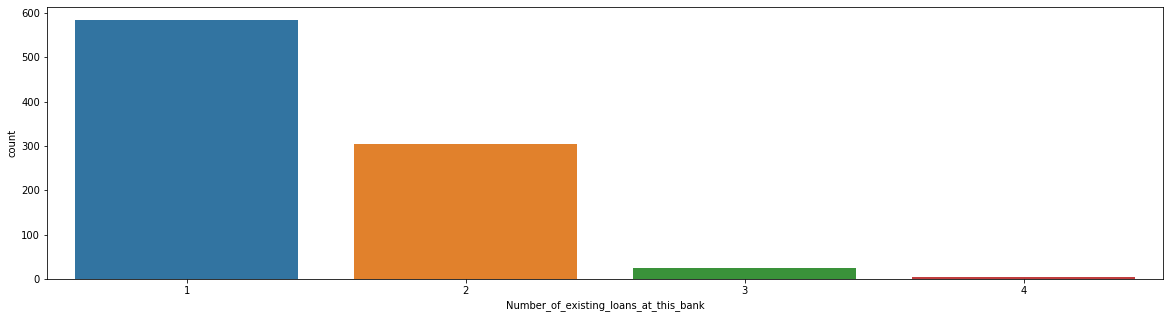

In [105]:
# for i in range(len(cat_col)):
plt.figure(figsize=(20,5))
sns.countplot(x =num_col[10], data = df_new)
calculate_percentage_n(num_col[10])

Observations:
* Person which has higher number of existing loans from the bank are considered to be as low risk applicant, the reason can be person is already responsible for few loans and not paying back one can effect his/her other loans. More realiability-> More chance of low risk applicant

In [106]:
df_new_1=df_new.copy()
# making a sample and then applying label encoding over it wrt high risk applicant in order to be safe if one need to undo the encoding

# Droping columns based on EDA 
years_employed_atmost, years at current residence, dependents, employemnt status, loan history, current balance upper as well as lower limit


In [107]:
col_drop=['Employed_for_at_most_years', 'Years_at_current_residence', 'Number_of_dependents', 'Employment_status', 'Loan_history', 'Balance_in_existing_bank_account_(lower_limit_of_bucket)','Balance_in_existing_bank_account_(upper_limit_of_bucket)']

In [108]:
df_new_1=df_new_1.drop(col_drop, axis=1)

In [109]:
df_new_1.shape

(918, 16)

# Label Encoding

Preparing the datafraem for training model

In [110]:
from sklearn import preprocessing
cols=['Gender', 'Marital_status', 'Housing',
       'Foreign_worker', 'SA_balance_type', 'Purpose', 'Property',
       'Has_coapplicant', 'Has_guarantor','high_risk_applicant']
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
for col in cols:
       df_new_1[col]= label_encoder.fit_transform(df_new_1[col])
       print(df_new_1[col].unique())

[1 0]
[3 1 0 2]
[1 0 2]
[1 0]
[3 1 0 4 2]
[5 4 6 0 8 1 3 7 2]
[3 0 1 2]
[0 1]
[0 1]
[0 1]


Let's check the entire dataframe

In [111]:
df_new_1

,Primary_applicant_age_in_years,Gender,Marital_status,Housing,Employed_for_at_least_years,Foreign_worker,SA_balance_type,Months_loan_taken_for,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Number_of_existing_loans_at_this_bank,high_risk_applicant
0,67,1,3,1,7,1,3,6,5,1169000,4,3,0,0,2,0
1,22,0,1,1,1,1,1,48,5,5951000,2,3,0,0,1,1
2,49,1,3,1,4,1,1,12,4,2096000,2,3,0,0,1,0
4,53,1,3,0,1,1,1,24,6,4870000,3,0,0,0,2,1
6,53,1,3,1,7,1,0,24,0,2835000,3,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,31,0,1,1,4,1,1,12,0,1736000,3,3,0,0,1,0
996,40,1,0,1,1,1,1,30,8,3857000,4,1,0,0,1,0
997,38,1,3,1,7,1,1,12,5,804000,4,2,0,0,1,0
998,23,1,3,0,1,1,1,45,5,1845000,4,0,0,0,1,1


It can be seen from above dataframe that last index is 999, hence reseting the index

In [112]:
df_new_1.reset_index(inplace=True)

Checking if reset index is applied or not

In [113]:
df_new_1

,index,Primary_applicant_age_in_years,Gender,Marital_status,Housing,Employed_for_at_least_years,Foreign_worker,SA_balance_type,Months_loan_taken_for,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Number_of_existing_loans_at_this_bank,high_risk_applicant
0,0,67,1,3,1,7,1,3,6,5,1169000,4,3,0,0,2,0
1,1,22,0,1,1,1,1,1,48,5,5951000,2,3,0,0,1,1
2,2,49,1,3,1,4,1,1,12,4,2096000,2,3,0,0,1,0
3,4,53,1,3,0,1,1,1,24,6,4870000,3,0,0,0,2,1
4,6,53,1,3,1,7,1,0,24,0,2835000,3,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,995,31,0,1,1,4,1,1,12,0,1736000,3,3,0,0,1,0
914,996,40,1,0,1,1,1,1,30,8,3857000,4,1,0,0,1,0
915,997,38,1,3,1,7,1,1,12,5,804000,4,2,0,0,1,0
916,998,23,1,3,0,1,1,1,45,5,1845000,4,0,0,0,1,1


Understanding the final dataframe

In [114]:
df_new_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 17 columns):
 #   Column                                       Non-Null Count  Dtype
---  ------                                       --------------  -----
 0   index                                        918 non-null    int64
 1   Primary_applicant_age_in_years               918 non-null    int64
 2   Gender                                       918 non-null    int32
 3   Marital_status                               918 non-null    int32
 4   Housing                                      918 non-null    int32
 5   Employed_for_at_least_years                  918 non-null    int64
 6   Foreign_worker                               918 non-null    int32
 7   SA_balance_type                              918 non-null    int32
 8   Months_loan_taken_for                        918 non-null    int64
 9   Purpose                                      918 non-null    int32
 10  Principal_loan_amount     

Understanding co-relation wrt high risk applicant column

In [115]:
# df_new_1.corrwith(df_new_1['high_risk_applicant'])


In [116]:
# df_new_1.corrwith(df_new_1['high_risk_applicant'])> 0

Downloading dataframe which will be used for training the model

In [117]:
df_new_1.to_csv('loan_modified.csv')